In [63]:
import pandas as pd
import nltk

from sklearn.feature_extraction.text import CountVectorizer

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [53]:
! pip install wordcloud

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score

In [65]:
df = pd.read_csv('c:\\sms.tsv', header=None, sep='\t', names = ['label', 'email'])

In [66]:
df.shape


(5572, 2)

In [67]:
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
df.label1.value_counts()/df.shape[0]*100

ham     86.593683
spam    13.406317
Name: label1, dtype: float64

In [12]:
df['label_num'] = df.label1.map({'ham' :0, 'spam' :1})

In [14]:
df.head()

,label1,email1,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
X = df.email1
y = df.label_num

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [18]:
print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [19]:
vect = CountVectorizer()

In [20]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [21]:
feature_names = vect.get_feature_names()

In [22]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
X_train_dtm = pd.DataFrame(X_train_dtm.toarray(), columns=feature_names)

In [24]:
X_train_dtm.head()

,00,000,000pes,008704050406,0089,0121,01223585334,02,0207,02073162414,...,zaher,zed,zeros,zhong,zindgi,zoe,zogtorius,zyada,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_train_dtm.shape

(3900, 7190)

In [ ]:
# print(vect.vocabulary_)

In [26]:
X_test_dtm = vect.transform(X_test)

In [27]:
X_test_dtm.shape

(1672, 7190)

In [28]:
nb = MultinomialNB()

In [29]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [30]:
pred = nb.predict(X_test_dtm)

In [31]:
confusion_matrix(y_test, pred)

array([[1432,   10],
       [  20,  210]], dtype=int64)

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.95      0.91      0.93       230

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [33]:
pred_train = nb.predict(X_train_dtm)

In [34]:
print("Classification report on train data")
print(classification_report(y_train, pred_train))

Classification report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3383
           1       0.99      0.97      0.98       517

    accuracy                           0.99      3900
   macro avg       0.99      0.98      0.99      3900
weighted avg       0.99      0.99      0.99      3900



In [35]:
print(confusion_matrix(y_train, pred_train))

[[3377    6]
 [  15  502]]


In [36]:
X_test[(y_test == 1) & (pred == 0)].shape

(20,)

In [37]:
# False Negative

X_test[(y_test == 1) & (pred == 0)]

4213    Missed call alert. These numbers called but le...
2965    Do you ever notice that when you're driving, a...
3864    Oh my god! I've found your number again! I'm s...
2663    Hello darling how are you today? I would love ...
5370    dating:i have had two of these. Only started a...
1500    SMS. ac JSco: Energy is high, but u may not kn...
1458    CLAIRE here am havin borin time & am now alone...
5449    Latest News! Police station toilet stolen, cop...
1638    0A$NETWORKS allow companies to bill for SMS, s...
3530    Xmas & New Years Eve tickets are now on sale f...
4298    thesmszone.com lets you send free anonymous an...
2821    INTERFLORA - It's not too late to order Inter...
3460    Not heard from U4 a while. Call me now am here...
1469    Hi its LUCY Hubby at meetins all day Fri & I w...
4144    In The Simpsons Movie released in July 2007 na...
1430    For sale - arsenal dartboard. Good condition b...
684     Hi I'm sue. I am 20 years old and work as a la...
856     Talk s

In [38]:
# False Positive

X_test[(y_test == 0) & (pred == 1)]

1644                  U WILL SWITCH YOUR FONE ON DAMMIT!!
1260    We have sent JD for Customer Service cum Accou...
45                       No calls..messages..missed calls
4557                              Gettin rdy to ship comp
574                                Waiting for your call.
1988                     No calls..messages..missed calls
5046    We have sent JD for Customer Service cum Accou...
1290    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
4600              Have you laid your airtel line to rest?
4382               Mathews or tait or edwards or anderson
Name: email1, dtype: object

In [55]:
 nb.predict_proba(X_test_dtm)[: , 1]

array([1.12813357e-10, 7.22997270e-05, 1.62195446e-09, ...,
       3.82081914e-03, 2.79093771e-17, 1.18297628e-21])

In [40]:
pred_prob = nb.predict_proba(X_test_dtm)[: , 1]

In [41]:
pred_prob

array([1.12813357e-10, 7.22997270e-05, 1.62195446e-09, ...,
       3.82081914e-03, 2.79093771e-17, 1.18297628e-21])

In [42]:
pred_prob

array([1.12813357e-10, 7.22997270e-05, 1.62195446e-09, ...,
       3.82081914e-03, 2.79093771e-17, 1.18297628e-21])

In [43]:
roc_auc_score(y_test, pred_prob)

0.9735271060724838

In [45]:
X_ham = df[df.label_num == 0].email1

In [46]:
X_spam = df[df.label_num ==  1].email1

In [47]:
words_ham = ' '.join(X_ham)

In [48]:
type(words_ham)

str

In [56]:
from wordcloud import WordCloud, STOPWORDS

In [57]:
wordcloud_ham = WordCloud(background_color='white').generate(words_ham)

In [58]:
import matplotlib.pyplot as plt

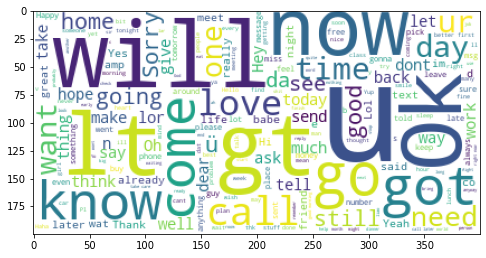

In [59]:
plt.figure(figsize=(8,12))
plt.imshow(wordcloud_ham)

In [60]:
words_spam = ' '.join(X_spam)

In [61]:
wordcloud_spam = WordCloud(background_color='white').generate(words_spam)

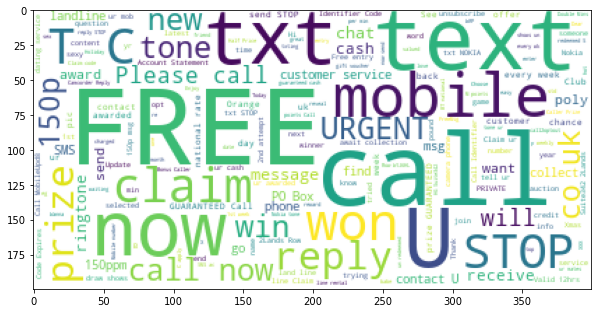

In [62]:
plt.figure(figsize=(10,12))
plt.imshow(wordcloud_spam)